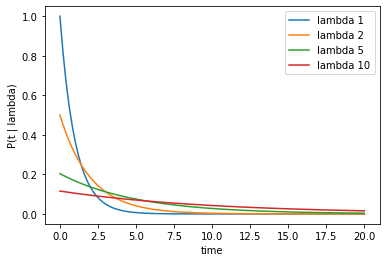

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

# the exponential function
#
def exponential(t, l, a, b):
    z = l * (np.exp(-a/l) - np.exp(-b/l))
    p = np.exp(-t/l)/z
    return p

a = 0
b = 20
t = np.linspace(a, b, 100)

p1  = exponential(t,  1, a, b) # lambda = 1
p2  = exponential(t,  2, a, b) # lambda = 2
p5  = exponential(t,  5, a, b) # lambda = 5
p10 = exponential(t, 10, a, b) # lambda = 10

plt.plot(t, p1,  label='lambda 1')
plt.plot(t, p2,  label='lambda 2')
plt.plot(t, p5,  label='lambda 5')
plt.plot(t, p10, label='lambda 10')
plt.legend(loc="upper right")
plt.xlabel("time")
plt.ylabel("P(t | lambda)")
plt.show()

P of data 7.667648073721999e-51 for lambda 0.01
P of data 0.18888079698124408 for lambda 0.5149494949494949
P of data 0.30231350775481075 for lambda 1.0198989898989899
P of data 0.29853847132484174 for lambda 1.5248484848484847
P of data 0.2727838571780168 for lambda 2.0297979797979795
P of data 0.24582397636775388 for lambda 2.5347474747474745
P of data 0.22198517947795715 for lambda 3.039696969696969
P of data 0.2018104954498789 for lambda 3.544646464646464
P of data 0.18493446749884015 for lambda 4.049595959595959
P of data 0.17082155452190576 for lambda 4.554545454545454
P of data 0.15896676883641006 for lambda 5.059494949494949
P of data 0.14894381598847553 for lambda 5.564444444444444
P of data 0.14040725940703855 for lambda 6.0693939393939385
P of data 0.13308164659648175 for lambda 6.574343434343434
P of data 0.12674841161589376 for lambda 7.0792929292929285
P of data 0.12123400180040134 for lambda 7.584242424242424
P of data 0.11640008627552337 for lambda 8.089191919191919
P o

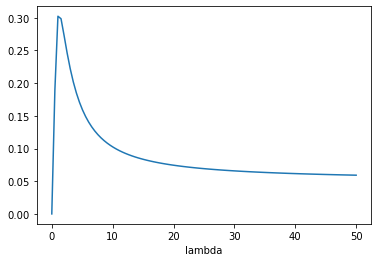

In [25]:
l = np.linspace(0.01, 50, 100)

# the likelihood function
#
def likelihood(l, data, a, b):
    like = []
    
    for x in range(len(l)):  # for each lambda, calculate the likelihood (thislike)
        
        thisl = l[x] # the value of lambda
        
        thislike = 1 # initialzie the likelihood to 1
        for d in range(len(data)):
            thislike *= exponential(data[d], thisl, a, b)   # multiply the probability of all data points
            print("P of data", thislike, "for lambda", thisl)
            
        like.append(thislike) # store this likelihood
    return like

# only one data point!
# and you already get a bump!
#
data = [1.2]
like = likelihood(l, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), "posterior max", np.argmax(like))
plt.plot(l, like)
plt.xlabel("lambda")
plt.show()
    

N =  6 data mean 4.8 posterior max 5.059494949494949


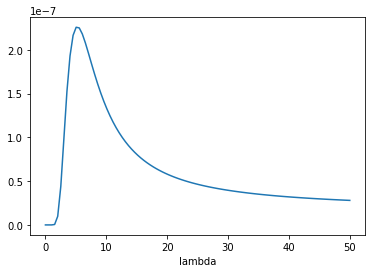

In [11]:
# the data in the lecture notes
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(l, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(like)])
plt.plot(l, like)
plt.xlabel("lambda")
plt.show()

N =  12 data mean 4.8 posterior max 5.059494949494949


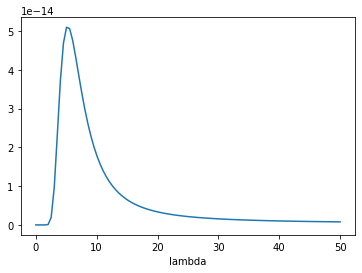

In [12]:
# add more data with same mean
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(l, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(like)])
plt.plot(l, like)
plt.xlabel("lambda")
plt.show()


N =  18 data mean 4.8 posterior max 5.059494949494949


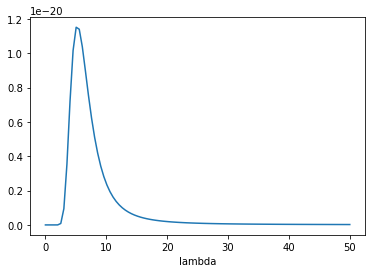

In [13]:
# even more data with same mean
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(l, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(like)])
plt.plot(l, like)
plt.xlabel("lambda")
plt.show()


N =  54 data mean 4.799999999999999 posterior max 5.059494949494949


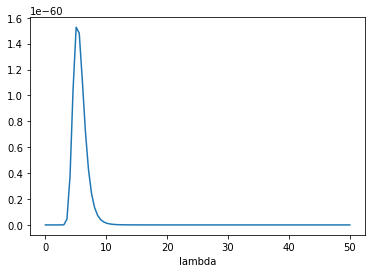

In [14]:
# alot more data with the same mean
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(l, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(like)])
plt.plot(l, like)
plt.xlabel("lambda")
plt.show()


N =  2 data mean 1.55 posterior max 1.5248484848484847


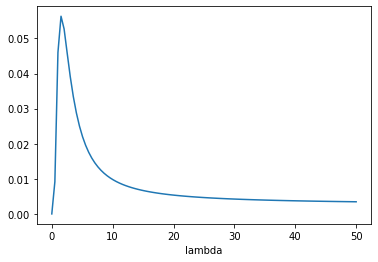

In [15]:
# some weird data.
# Is the exponential distribution a good model for this data?
#
data = [0.1,3]
like = likelihood(l, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(like)])
plt.plot(l, like)
plt.xlabel("lambda")
plt.show()


N =  12 data mean 4.8 posterior max 0.01


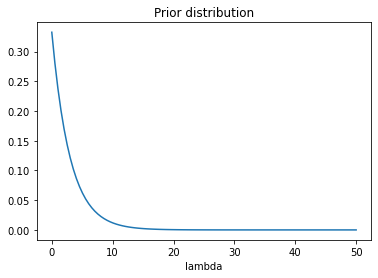

N =  12 data mean 4.8 posterior max 5.059494949494949


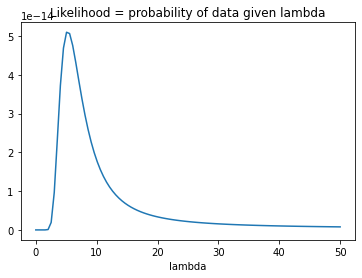

N =  12 data mean 4.8 posterior max 4.554545454545454


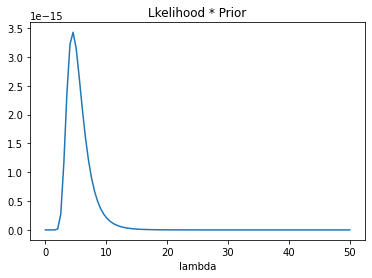

In [23]:
# what happens when you add a more informative prior for lambda
#
# Someone tells you in previous experiments the mean of the wait times from previous experiments
#
prev_mean = 0.1
prev_mean = 3
#prev_mean = 30000
prior = exponential(l, prev_mean, a, b)
#print(prior)

data = [1.2, 2.1, 3.4, 4.1, 7, 11, 1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(l, data, a, b)

both = like*prior

print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(prior)])
plt.plot(l, prior)
plt.title("Prior distribution")
plt.xlabel("lambda")
plt.show()

print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(like)])
plt.plot(l, like)
plt.title("Likelihood = probability of data given lambda")
plt.xlabel("lambda")
plt.show()

print("N = ", len(data), "data mean", np.mean(data), "posterior max", l[np.argmax(both)])
plt.plot(l, both)
plt.title("Lkelihood * Prior")
plt.xlabel("lambda")
plt.show()

